# Task 1

- describe concisely, with stats and plots, the core characteristics of the dataset.
- What are extreme values for the gas?

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta

dataset = 'data/output.csv'

steel_process = pd.read_csv(dataset)
steel_process.head(150)

,heatid,datetime,end_t,gas1
0,16523,2023-01-01 01:00:00,NaN,9.847
1,16523,2023-01-01 01:00:05,NaN,9.850
2,16523,2023-01-01 01:00:10,NaN,9.852
3,16523,2023-01-01 01:00:15,NaN,9.856
4,16523,2023-01-01 01:00:20,NaN,9.863
...,...,...,...,...
145,16523,2023-01-01 01:12:55,NaN,10.687
146,16523,2023-01-01 01:12:55,1648.0,10.687
147,16524,2023-01-01 02:00:00,NaN,9.845
148,16524,2023-01-01 02:00:05,NaN,9.847


# describe

In [114]:
steel_process.describe()

,heatid,end_t,gas1
count,108987.000000,690.000000,108987.000000
mean,16867.321745,1704.950725,9.879033
std,199.161575,70.649201,2.154289
min,16523.000000,1545.000000,0.000000
25%,16695.000000,1645.250000,10.091000
50%,16868.000000,1706.000000,10.341000
75%,17039.000000,1758.000000,10.555000
max,17212.000000,1918.000000,10.905000


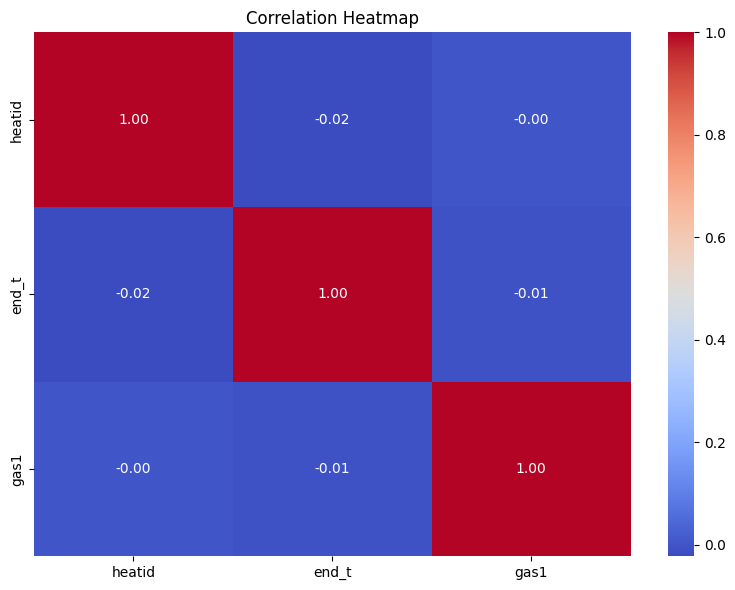

In [115]:
correlation_matrix = steel_process[['heatid','end_t','gas1']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the plot
plt.show()

# number of historical processes

In [116]:
print(f"number of historical processes: {len(steel_process['heatid'].unique())}")

number of historical processes: 690


# missing values

In [117]:
row_nan_count = steel_process.isna().sum(axis=0)

print(row_nan_count)

heatid           0
datetime         0
end_t       108297
gas1             0
dtype: int64


<Axes: ylabel='gas1'>

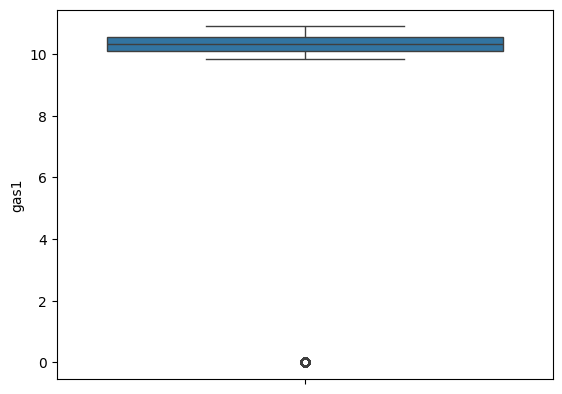

In [118]:
sns.boxplot(steel_process['gas1'])

In [119]:
steel_process[steel_process['gas1'] < 9]

,heatid,datetime,end_t,gas1
10,16523,2023-01-01 01:01:00,NaN,0.0
25,16523,2023-01-01 01:02:15,NaN,0.0
40,16523,2023-01-01 01:03:35,NaN,0.0
57,16523,2023-01-01 01:05:00,NaN,0.0
75,16523,2023-01-01 01:06:35,NaN,0.0
...,...,...,...,...
108876,17212,2023-01-30 23:03:30,NaN,0.0
108933,17212,2023-01-30 23:08:35,NaN,0.0
108947,17212,2023-01-30 23:10:10,NaN,0.0
108961,17212,2023-01-30 23:11:40,NaN,0.0


In [120]:
outlier_portion = len(steel_process[steel_process['gas1'] < 9])/len(steel_process)

form_outlier_portion = "{:.2%}".format(outlier_portion)
print(f"Gas outliers in the dataset is :{form_outlier_portion}")

Gas outliers in the dataset is :4.48%


<Axes: ylabel='end_t'>

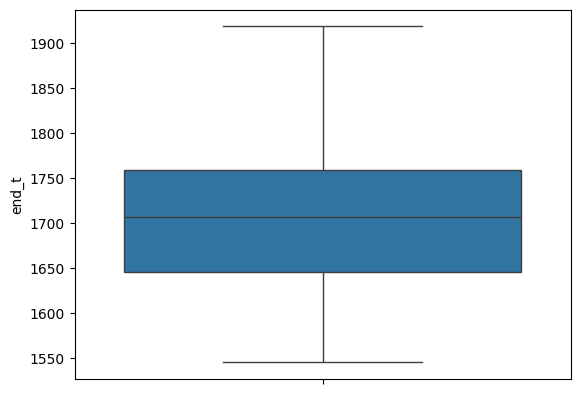

In [121]:
sns.boxplot(steel_process['end_t'])

# Task 2
- Propose a function to time shift the data.
- how to store timestamps for different measurements in the database? Why?

In [122]:
# It works only in the case the difference between each row is 5 sec

def shift_dataframe_row(df, column):
    df[column+'_shifted'] = df[column].shift(periods=-1)
    return df 

In [123]:
steel_process = shift_dataframe_row(steel_process,'datetime')

In [124]:
steel_process['date-diff'] = pd.to_datetime(steel_process['datetime_shifted'])- pd.to_datetime(steel_process['datetime'])

In [125]:
steel_process.head(15)

,heatid,datetime,end_t,gas1,datetime_shifted,date-diff
0,16523,2023-01-01 01:00:00,NaN,9.847,2023-01-01 01:00:05,0 days 00:00:05
1,16523,2023-01-01 01:00:05,NaN,9.850,2023-01-01 01:00:10,0 days 00:00:05
2,16523,2023-01-01 01:00:10,NaN,9.852,2023-01-01 01:00:15,0 days 00:00:05
3,16523,2023-01-01 01:00:15,NaN,9.856,2023-01-01 01:00:20,0 days 00:00:05
4,16523,2023-01-01 01:00:20,NaN,9.863,2023-01-01 01:00:35,0 days 00:00:15
5,16523,2023-01-01 01:00:35,NaN,9.884,2023-01-01 01:00:40,0 days 00:00:05
6,16523,2023-01-01 01:00:40,NaN,9.890,2023-01-01 01:00:45,0 days 00:00:05
7,16523,2023-01-01 01:00:45,NaN,9.890,2023-01-01 01:00:50,0 days 00:00:05
8,16523,2023-01-01 01:00:50,NaN,9.890,2023-01-01 01:00:55,0 days 00:00:05
9,16523,2023-01-01 01:00:55,NaN,9.899,2023-01-01 01:01:00,0 days 00:00:05


In [126]:
steel_process['date-diff'] = steel_process['date-diff'].dt.total_seconds()

In [127]:
steel_process.head(15)

,heatid,datetime,end_t,gas1,datetime_shifted,date-diff
0,16523,2023-01-01 01:00:00,NaN,9.847,2023-01-01 01:00:05,5.0
1,16523,2023-01-01 01:00:05,NaN,9.850,2023-01-01 01:00:10,5.0
2,16523,2023-01-01 01:00:10,NaN,9.852,2023-01-01 01:00:15,5.0
3,16523,2023-01-01 01:00:15,NaN,9.856,2023-01-01 01:00:20,5.0
4,16523,2023-01-01 01:00:20,NaN,9.863,2023-01-01 01:00:35,15.0
5,16523,2023-01-01 01:00:35,NaN,9.884,2023-01-01 01:00:40,5.0
6,16523,2023-01-01 01:00:40,NaN,9.890,2023-01-01 01:00:45,5.0
7,16523,2023-01-01 01:00:45,NaN,9.890,2023-01-01 01:00:50,5.0
8,16523,2023-01-01 01:00:50,NaN,9.890,2023-01-01 01:00:55,5.0
9,16523,2023-01-01 01:00:55,NaN,9.899,2023-01-01 01:01:00,5.0


In [128]:
date_time_difference_portion = len(steel_process[steel_process['date-diff'] > 5]) / len(steel_process)

form_outlier_portion = "{:.2%}".format(date_time_difference_portion)
print(f"Datetime outliers in the dataset is :{form_outlier_portion}")

Datetime outliers in the dataset is :10.41%


# as 10% of the data doesnot follow the rule need another function


In [129]:
steel_process['datetime_mod'] = steel_process['datetime'].apply(lambda x: pd.to_datetime(x) - timedelta(seconds=5))

In [130]:
steel_process.head()

,heatid,datetime,end_t,gas1,datetime_shifted,date-diff,datetime_mod
0,16523,2023-01-01 01:00:00,NaN,9.847,2023-01-01 01:00:05,5.0,2023-01-01 00:59:55
1,16523,2023-01-01 01:00:05,NaN,9.850,2023-01-01 01:00:10,5.0,2023-01-01 01:00:00
2,16523,2023-01-01 01:00:10,NaN,9.852,2023-01-01 01:00:15,5.0,2023-01-01 01:00:05
3,16523,2023-01-01 01:00:15,NaN,9.856,2023-01-01 01:00:20,5.0,2023-01-01 01:00:10
4,16523,2023-01-01 01:00:20,NaN,9.863,2023-01-01 01:00:35,15.0,2023-01-01 01:00:15


In [131]:
df_st = steel_process[['heatid','datetime_mod','end_t','gas1']]

In [132]:
df_st.head()

,heatid,datetime_mod,end_t,gas1
0,16523,2023-01-01 00:59:55,NaN,9.847
1,16523,2023-01-01 01:00:00,NaN,9.850
2,16523,2023-01-01 01:00:05,NaN,9.852
3,16523,2023-01-01 01:00:10,NaN,9.856
4,16523,2023-01-01 01:00:15,NaN,9.863


In [133]:
df_st.corr()

,heatid,datetime_mod,end_t,gas1
heatid,1.000000,0.999999,-0.022023,-0.001246
datetime_mod,0.999999,1.000000,-0.021848,-0.001210
end_t,-0.022023,-0.021848,1.000000,-0.009463
gas1,-0.001246,-0.001210,-0.009463,1.000000


# visualize some process

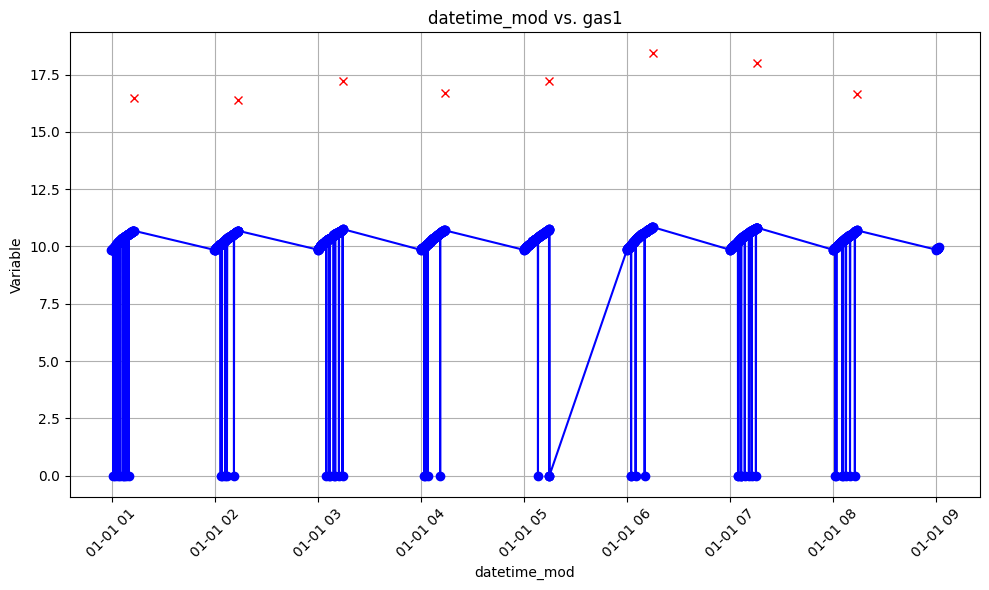

In [142]:
df_sample = df_st.head(1300)
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(df_sample['datetime_mod'], df_sample['gas1'], marker='o', linestyle='-', color='b')
plt.plot(df_sample['datetime_mod'], df_sample['end_t'].apply(lambda x: x/100), marker='x', linestyle='--', color='r', label='end_t')

plt.title('datetime_mod vs. gas1')
plt.xlabel('datetime_mod')
plt.ylabel('Variable')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [143]:
df_sample= df_sample[df_sample['gas1'] >9]

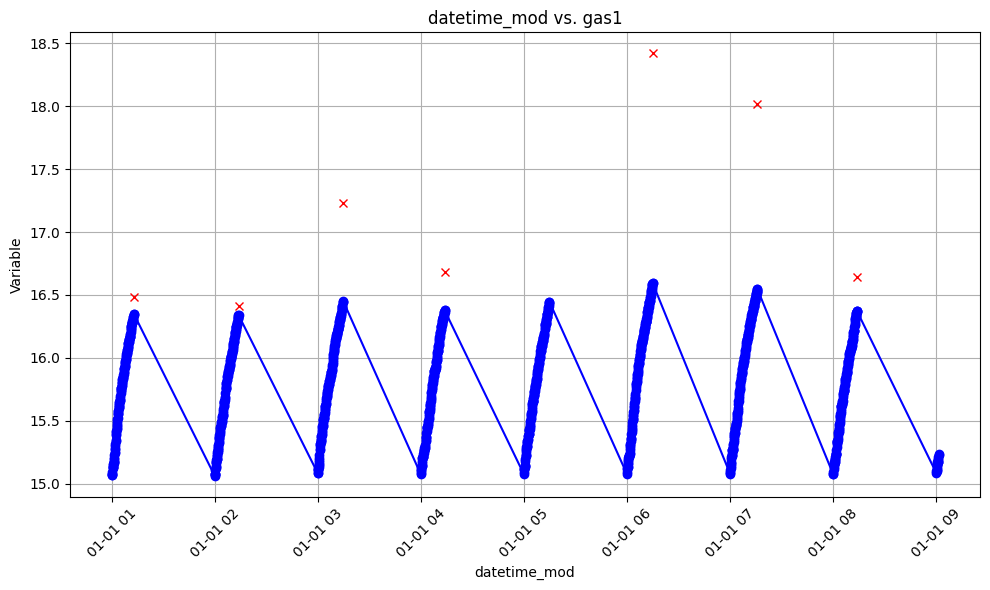

In [144]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(df_sample['datetime_mod'], df_sample['gas1'].apply(lambda x: x*1.53), marker='o', linestyle='-', color='b')
plt.plot(df_sample['datetime_mod'], df_sample['end_t'].apply(lambda x: x/100), marker='x', linestyle='--', color='r', label='end_t')


plt.title('datetime_mod vs. gas1')
plt.xlabel('datetime_mod')
plt.ylabel('Variable')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()